# Linear regression

## Introduction

Let $Y$ be a **dependent variable**, also called **response variable** or **predictor**, whose behaviour can be explained by the **independent variables** $X_1, X_2, \ldots, X_k$, also known as **explanatory variables** or **features**.

Unlike classification, where $Y$ can take a finite number of outcomes, in regression $Y$ is a continuous variable.

In linear regression, the relationship between the independent and dependent variables can be described as follows:
$$Y = \beta_0 + \beta_1 X_1 + \ldots \beta_k X_k + \epsilon$$
where $\beta_0, \beta_1, \ldots, \beta_k$ are the model parameters and $\epsilon$ is a random error. Typically, $\epsilon$ is assumed to follow a normal distribution with zero mean and constant variance.

In the most simple scenario, when there is a single independent variable $X$, the model is equivalent to
$$Y = \beta_0 + \beta_1 X + \epsilon$$
In other words, $(X, Y)$ lies around a straight line with intercept $\beta_0$ and slope $\beta_1$.

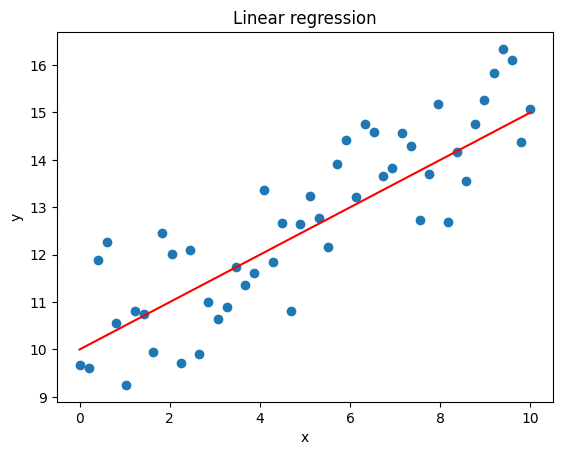

In [10]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=1000)
beta = [10, 0.5]
x = np.linspace(0, 10)
error = rng.normal(0, 1, size=x.shape)
y = beta[0] + beta[1]*x + error

plt.figure()
plt.title("Linear regression")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, "o")
plt.plot(x, beta[0] + beta[1]*x, "r-")
plt.show()

## Estimation

In real life applications, the model parameters are unknown and need to be estimated from the data. To do so, we need to ask ourselves which is the best straight line that describes our data? And what does exactly *best straight line* mean? What criteria do we use? Usually, we choose the parameters that minimizes the sum of the squared differences between the observed independent variable and the output of the linear function of the dependent variables.
$$(\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_k) = \underset{(\beta_0, \beta_1, \ldots, \beta_k)}{\text{arg min}} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_{i1} - \ldots - \beta_k x_{ik})^2$$

We call this estimator as **ordinary least squares** estimator.

To simplify the notation, let
* $\mathbf{y} = (y_1, \ldots, y_n)$ be the vector of observed independent variables,
* $\mathbf{\beta} = (\beta_0, \beta_1, \ldots, \beta_k)$ be the vector of model parameters, and
* $\mathbf{X} = (x_{ij})$ be the matrix of observed dependent variables, where each row $\mathbf{x}_i$ represents an observation and each column represents a feature.

The ordinary least squares estimator can be rewritten as
$$\hat{\beta} = \underset{\beta}{\text{arg min}}\sum_{i=1}^{n} (y_i - \mathbf{x}_i^{\top} \mathbf{\beta})^2$$
Simplifying even further
$$\hat{\beta} = \underset{\beta}{\text{arg min }} (\mathbf{y} - \mathbf{X\beta})^{\top} (\mathbf{y} - \mathbf{X\beta})$$

It can be shown that this estimator is the solution of the linear equation
$$\mathbf{X}^{\top} \mathbf{X} \hat{\beta} = \mathbf{X}^{\top} \mathbf{y}$$

In [6]:
from numpy.linalg import solve

X = np.column_stack((np.ones(x.shape), x))
with np.printoptions(threshold=10, edgeitems=3):
    print("Matrix of observed independent variables")
    print(X)
    print("Vector of observed independent variables")
    print(y)

beta_ols = solve(X.T @ X, X.T @ y)
print("Ordinary least squares estimator:")
print(beta_ols)

Matrix of observed independent variables
[[ 1.          0.        ]
 [ 1.          0.20408163]
 [ 1.          0.40816327]
 ...
 [ 1.          9.59183673]
 [ 1.          9.79591837]
 [ 1.         10.        ]]
Vector of observed independent variables
[ 9.67866979  9.61637934 11.88413976 ... 16.09676729 14.38464583
 15.07864082]
Ordinary least squares estimator:
[9.95883682 0.54698849]


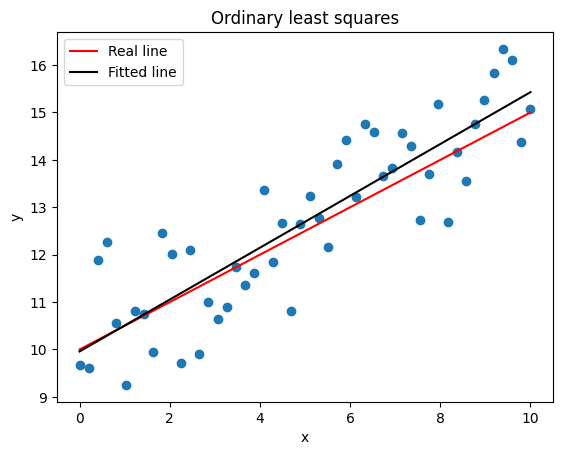

In [11]:
plt.figure()
plt.title("Ordinary least squares")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, "o")
plt.plot(x, beta[0] + beta[1]*x, "r-", label="Real line")
plt.plot(x, beta_ols[0] + beta_ols[1]*x, "k-", label="Fitted line")
plt.legend()
plt.show()